In [677]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [678]:
# Original Parameters
frequency = 10  # Hz
nyq = 2 * frequency #20 Is this just base frequency being used?
amplitude = 20
sampling_rate =  100 * nyq # 2000 Hz
duration1 = 1/5  # seconds


In [679]:
sample1 = 0.5 * nyq # 10 HZ 
sample2 = nyq # 20 Hz
sample3 = 4 * nyq # 80 Hz


In [680]:
N = duration1 * sampling_rate # 400
N1 = duration1 * sample1 # 2
N2 = duration1 * sample2 # 4
N3 = duration1 * sample3 # 16


In [681]:
# Time array
t_og = np.linspace(0, duration1, int(N), endpoint=False)
t1 = np.linspace(0, duration1, int(N1), endpoint=False)
t2 = np.linspace(0, duration1, int(N2), endpoint=False)
t3 = np.linspace(0, duration1, int(N3), endpoint=False)
# Continuous sinusoidal signal
continuous_signal_og = amplitude * np.sin(2 * np.pi * frequency * t_og+ np.pi/4)
continuous_signal1 = amplitude * np.sin(2 * np.pi * frequency * t1 + np.pi/4)
continuous_signal2 = amplitude * np.sin(2 * np.pi * frequency * t2 + np.pi/4)
continuous_signal3 = amplitude * np.sin(2 * np.pi * frequency * t3 + np.pi/4)
cont_signals = [continuous_signal1, continuous_signal2, continuous_signal3]
t = [t1, t2, t3]
mult = [100, 0.5, 1, 4]



0
1
2


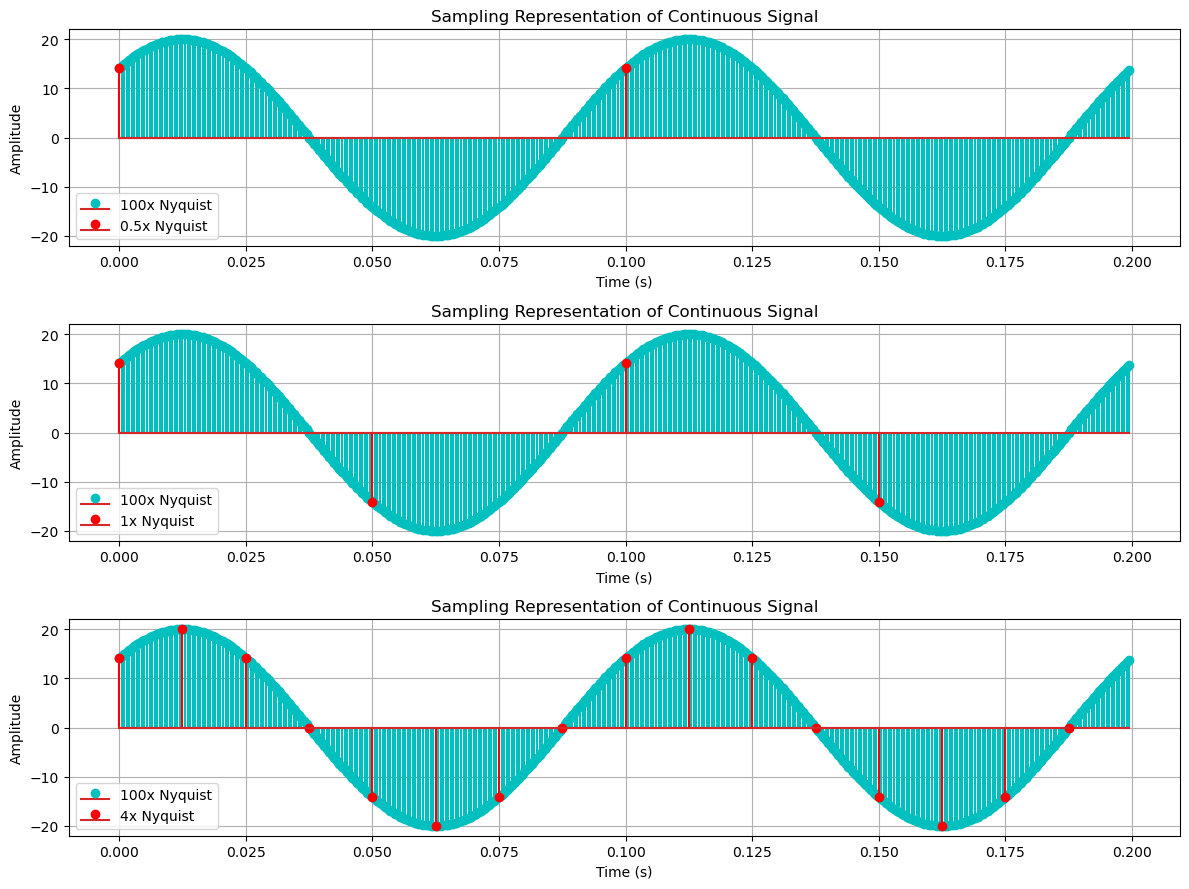

In [707]:
plt.figure(figsize=(12, 9))
#plt.subplot(len(cont_signals), 1, 1)
#plt.stem(t_og, continuous_signal_og)
for i, (signal, t_values) in enumerate(zip(cont_signals, t)):
    #plt.stem(t_og, continuous_signal_og)
    plt.subplot(len(cont_signals), 1, i+1)
    plt.stem(t_og, continuous_signal_og, label=f'100x Nyquist', linefmt='c')
    plt.stem(t_values, signal, label=f'{mult[i + 1]}x Nyquist', linefmt='r')
    plt.title(f'Sampling Representation of Continuous Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()
    print(i)
plt.tight_layout()
plt.show()

In [683]:
# variables ending with 'x' have more cycles for FFT
duration2 = 20 #changing number of cycles for better results
Nx = duration2 * sampling_rate
N1x = duration2 * sample1
N2x = duration2 * sample2
N3x = duration2 * sample3


In [684]:
# Time array
tx = np.linspace(0, duration2, int(Nx), endpoint=False)
t1x = np.linspace(0, duration2, int(N1x), endpoint=False)
t2x = np.linspace(0, duration2, int(N2x), endpoint=False)
t3x = np.linspace(0, duration2, int(N3x), endpoint=False)
# Continuous sinusoidal signal
continuous_signalx = amplitude * np.sin(2 * np.pi * frequency * tx+ np.pi/4)
continuous_signal1x = amplitude * np.sin(2 * np.pi * frequency * t1x + np.pi/4)
continuous_signal2x = amplitude * np.sin(2 * np.pi * frequency * t2x + np.pi/4)
continuous_signal3x = amplitude * np.sin(2 * np.pi * frequency * t3x + np.pi/4)


In [685]:
#fft = np.fft.fft(continuous_signal,2048)
fft = np.abs((np.fft.fft(continuous_signalx,2048))/(len(continuous_signalx)/2))
out = fft[0:int(len(fft)/2)]
freq = np.linspace(0,sampling_rate/2,len(out))

fft1 = np.abs((np.fft.fft(continuous_signal1x,2048))/(len(continuous_signal1x)/2))
out1 = fft1[0:int(len(fft1)/2)]
freq1 = np.linspace(0,sample1/2,len(out))

fft2 = np.abs((np.fft.fft(continuous_signal2x,2048))/(len(continuous_signal2x)/2))
out2 = fft2[0:int(len(fft2)/2)]
freq2 = np.linspace(0,sample2/2,len(out))

fft3 = np.abs((np.fft.fft(continuous_signal3x,2048))/(len(continuous_signal3x)/2))
out3 = fft3[0:int(len(fft3)/2)]
freq3 = np.linspace(0,sample3/2,len(out))
#freq = np.linspace(0, sampling_rate/2, len(fft_mag)) # frequency vector
#freq = np.fft.fftfreq(len(fft_mag), 1 / sampling_rate)

freq_list = [freq, freq1, freq2, freq3]
out_list = [out, out1, out2, out3]




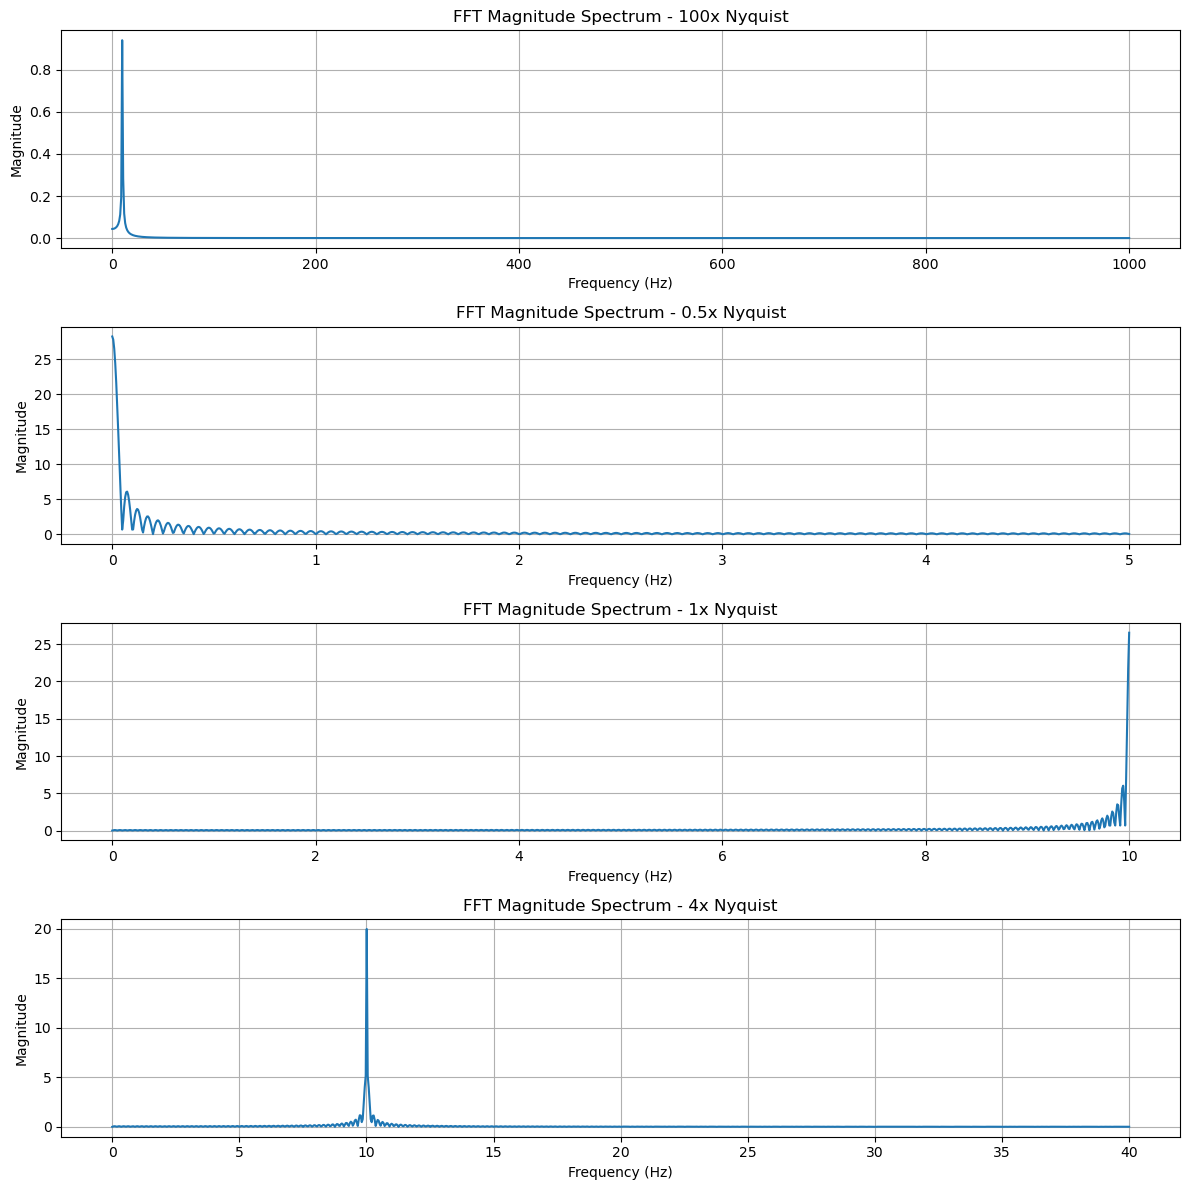

In [686]:
#for 100 * nyq, fs/2 = 1000 Hz
#Throw this in loop to output each graph
plt.figure(figsize=(12, 12))
for i, (f, o) in enumerate(zip(freq_list, out_list)):
    plt.subplot(len(freq_list), 1, i+1)
    plt.plot(f, o, label=f'{mult[i]}x Nyquist')
    plt.title(f'FFT Magnitude Spectrum - {mult[i]}x Nyquist')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
plt.tight_layout()
plt.show()


In [687]:
#creating new graph
sample4 = 10 * nyq #200
N4 = duration1 * sample4 #40
t4 = np.linspace(0, duration1, int(N4), endpoint=False)
continuous_signal4 = amplitude * np.sin(2 * np.pi * frequency * t4 + np.pi/4)

In [688]:
# Quantization levels for different bit depths
bit_depths = [16, 12, 8, 4]
quantization_levels = [2**bit_depth for bit_depth in bit_depths]

In [689]:
# Simulate digitization at different bit levels
digitized_signals = []
for levels in quantization_levels:
    m = min(continuous_signal4)
    signal_range = max(continuous_signal4) - min(continuous_signal4);
    normalized_signal = (continuous_signal4 - min(continuous_signal4))/(signal_range * 1.2)
    scaled_signal = np.round(normalized_signal * levels)
    undo = scaled_signal / levels
    quantized_signal = undo * (signal_range * 1.2) + min(continuous_signal4)
    digitized_signals.append(quantized_signal)
    # print(signal_range)
    # print(normalized_signal)
    # print(scaled_signal)
    # print(undo)
    # print(quantized_signal)

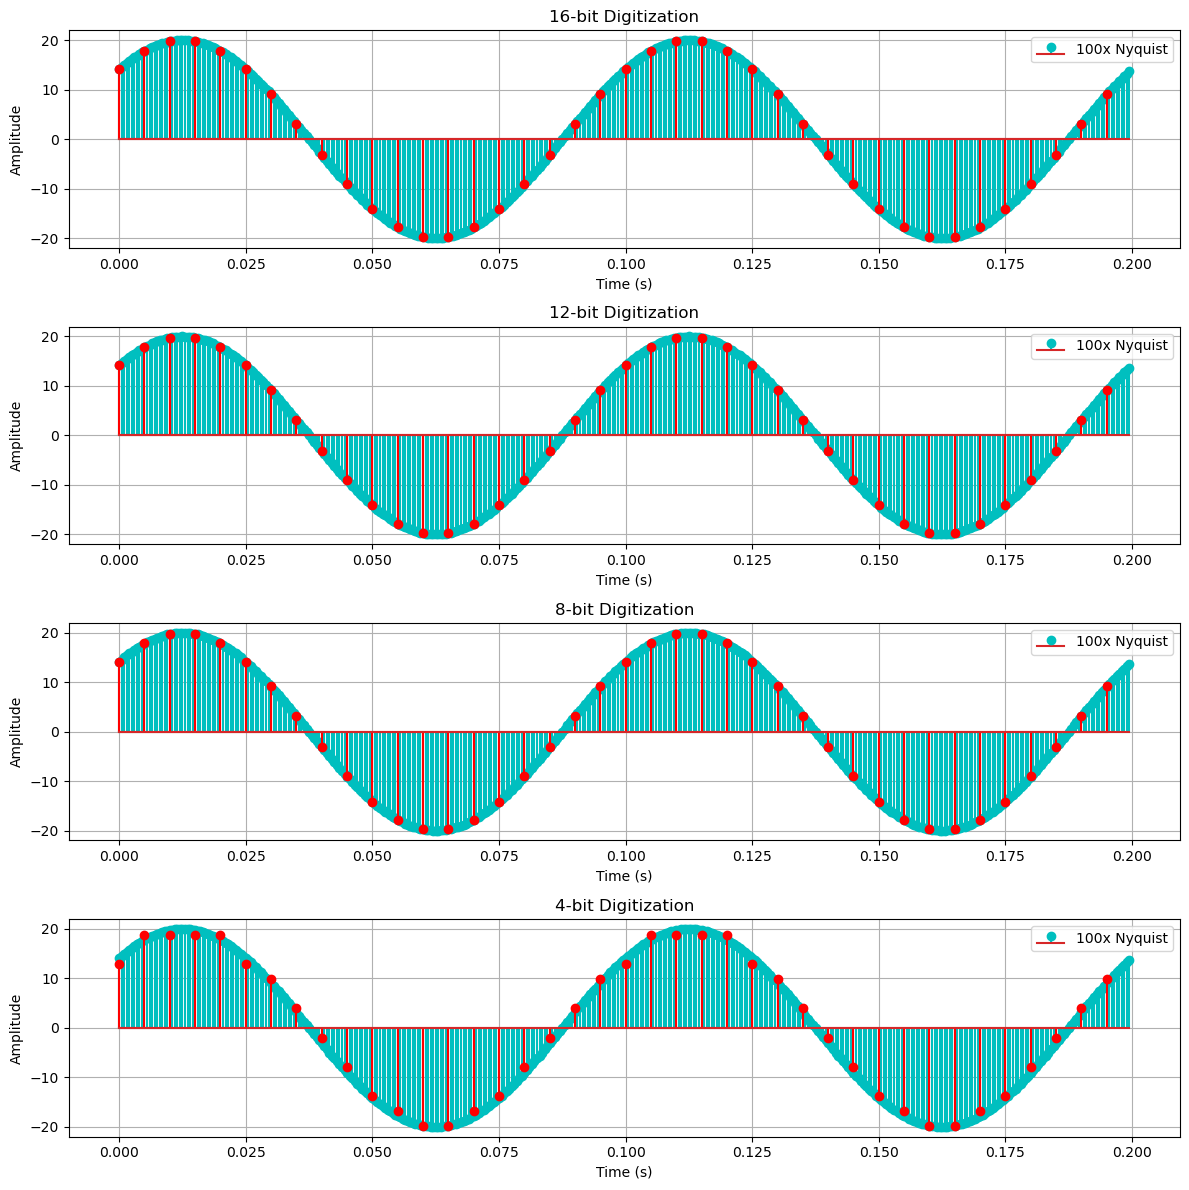

In [708]:
# Plot digitized signals
plt.figure(figsize=(12, 12))
for i, signal in enumerate(digitized_signals):
    plt.subplot(len(bit_depths), 1, i+1)
    plt.stem(t_og, continuous_signal_og, label=f'100x Nyquist', linefmt='c')
    plt.stem(t4, signal, linefmt='r')
    plt.title(f'{bit_depths[i]}-bit Digitization')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.show()

In [691]:
quantization_errors = []
# Compute quantization error for each digitized signal
for digitized_signal in digitized_signals:
    # Calculate quantization error for each sample
    error = digitized_signal - continuous_signal4
    # Append quantization error to the list
    quantization_errors.append(error)

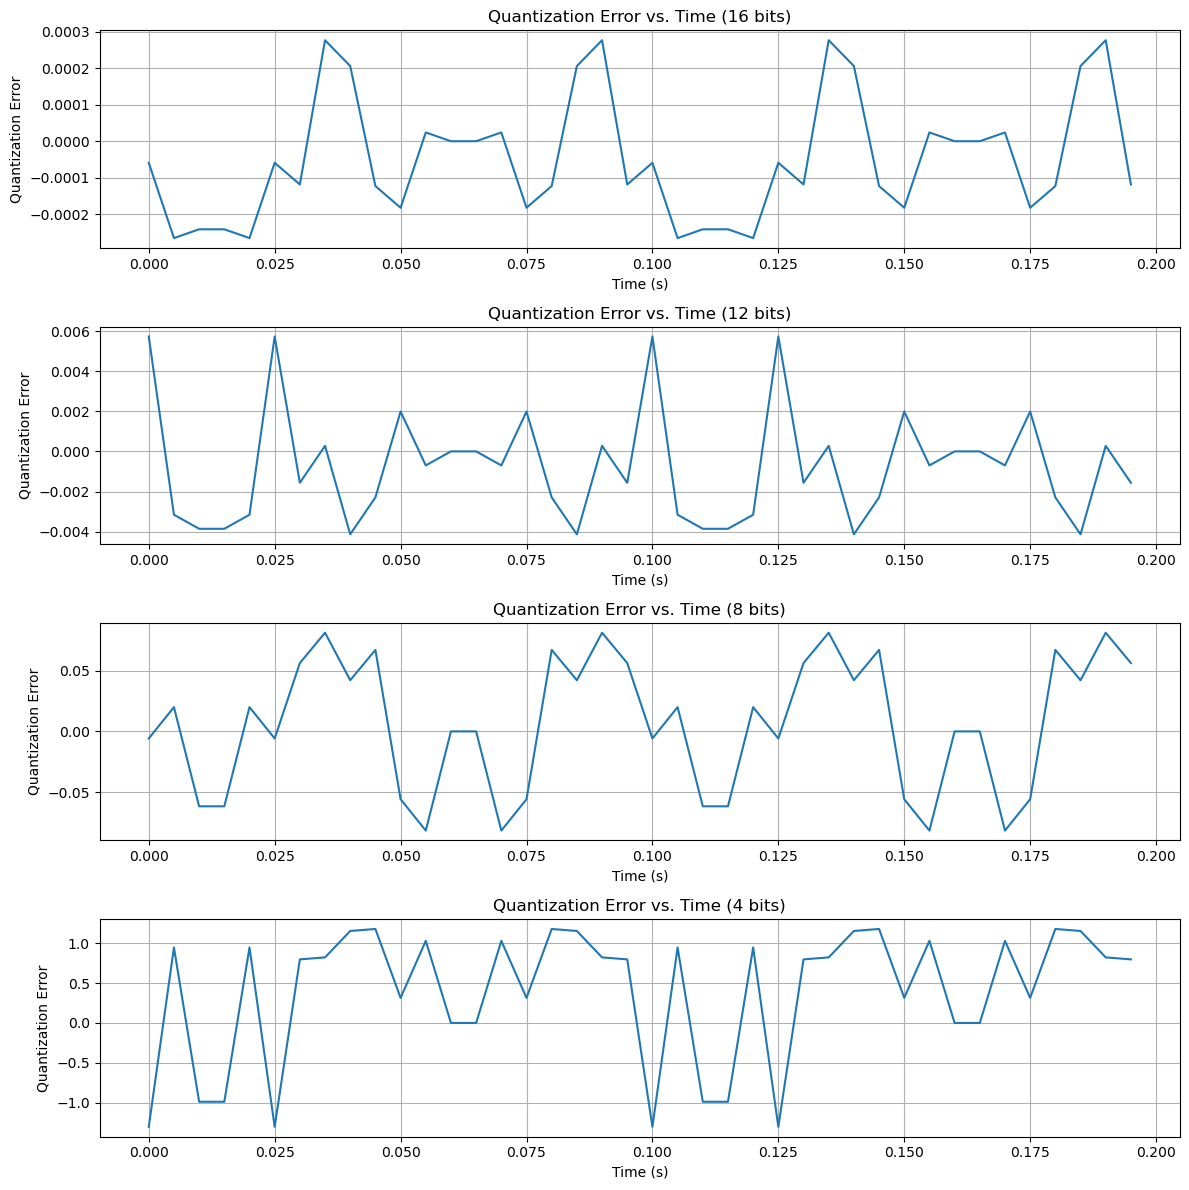

In [692]:
#plots all Q errors separate (keep)
#change to subplots
plt.figure(figsize=(12, 12))
for i, error in enumerate(quantization_errors):
    plt.subplot(len(quantization_errors), 1, i+1)
    plt.plot(t4, error)
    plt.xlabel("Time (s)")
    plt.ylabel("Quantization Error")
    plt.title(f"Quantization Error vs. Time ({bit_depths[i]} bits)")
    plt.grid(True)
plt.tight_layout()
plt.show()


In [693]:
signal_range = max(continuous_signal_og) - min(continuous_signal_og)
normalized_signal = (continuous_signal_og - min(continuous_signal_og))/(signal_range*1.2)
scaled_signal = np.round(normalized_signal * quantization_levels[1])
undo = scaled_signal / quantization_levels[1]
quantized_signal = undo * (signal_range * 1.2) + min(continuous_signal_og)

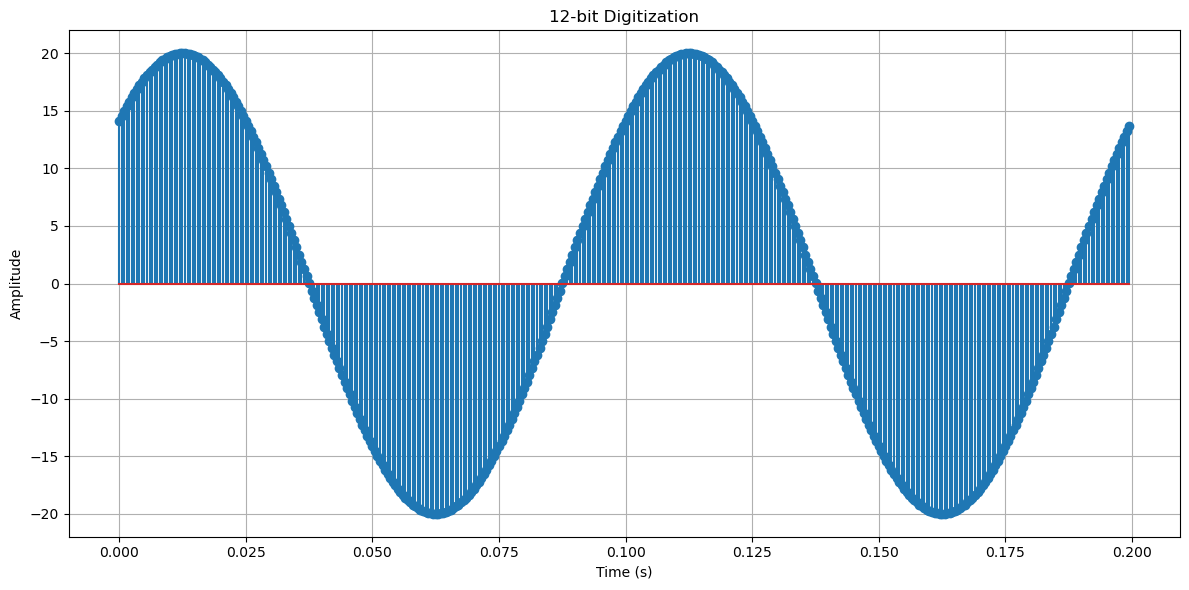

In [694]:
# Plot digitized signals
plt.figure(figsize=(12, 6))
plt.stem(t_og, quantized_signal)
plt.title('12-bit Digitization')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()
#400 samples shown in the graph, meaning there are 200 per full wave
# With 4096 levels quantization, cannot tell much difference

In [695]:
def butterLowpass(cut, fs, order):
    nyq = 0.5 * fs
    low = cut/nyq
    sos = sp.signal.butter(order, low, analog=False, btype='lowpass', output='sos')
    return sos


In [696]:
def butterLowpassFilter(data, cutF, fs, order =5):
    sos = butterLowpass(cutF, fs,order)
    filtered = sp.signal.sosfiltfilt(sos, data)
    return filtered


In [697]:
cutoff = 10 * nyq
lpf = butterLowpassFilter(quantized_signal, cutoff, sampling_rate)
# print(sampling_rate)
# print(cutoff)

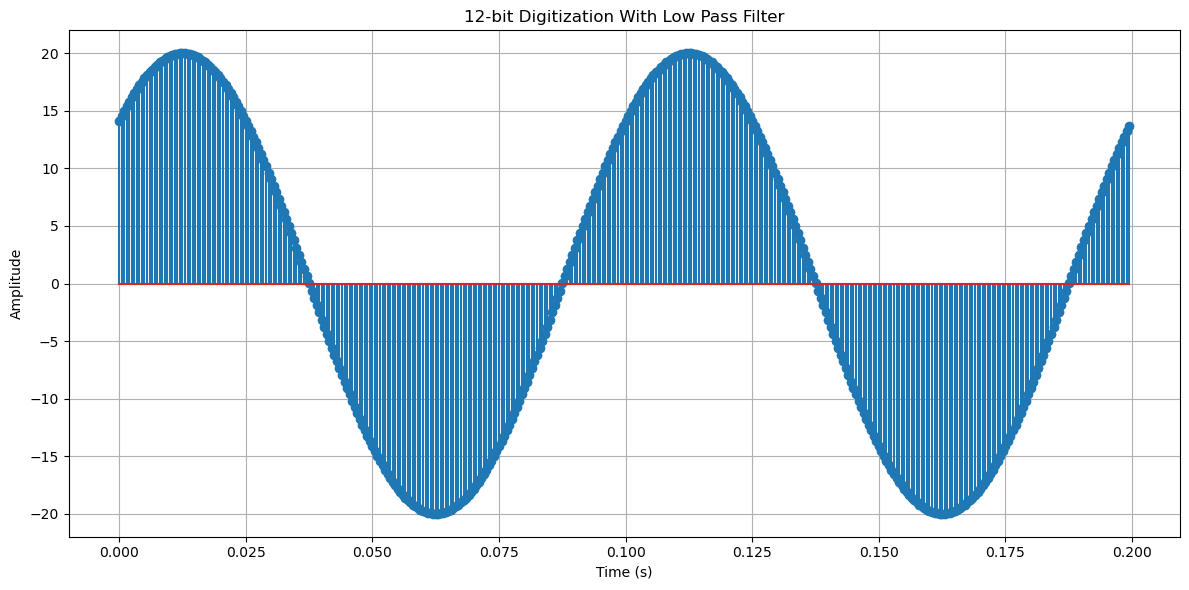

In [698]:
plt.figure(figsize=(12, 6))
plt.stem(t_og, lpf)
plt.title('12-bit Digitization With Low Pass Filter')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

In [699]:
# Step 3: Downsample
downsample_factor = 10
downsampled_signal = lpf[::downsample_factor]

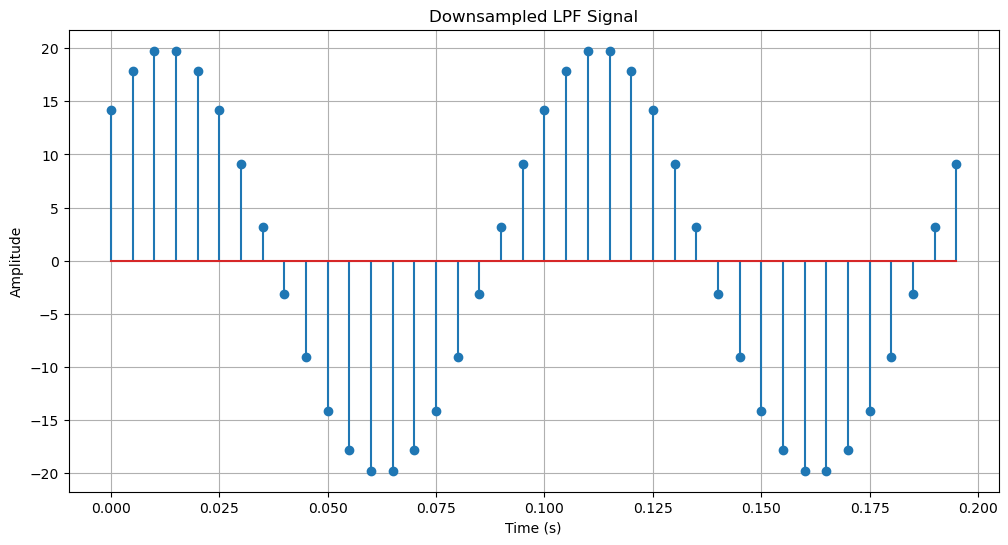

In [700]:
# Plotting the downsampled signal
plt.figure(figsize=(12, 6))
plt.stem(t4, downsampled_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Downsampled LPF Signal')
plt.grid(True)
plt.show()

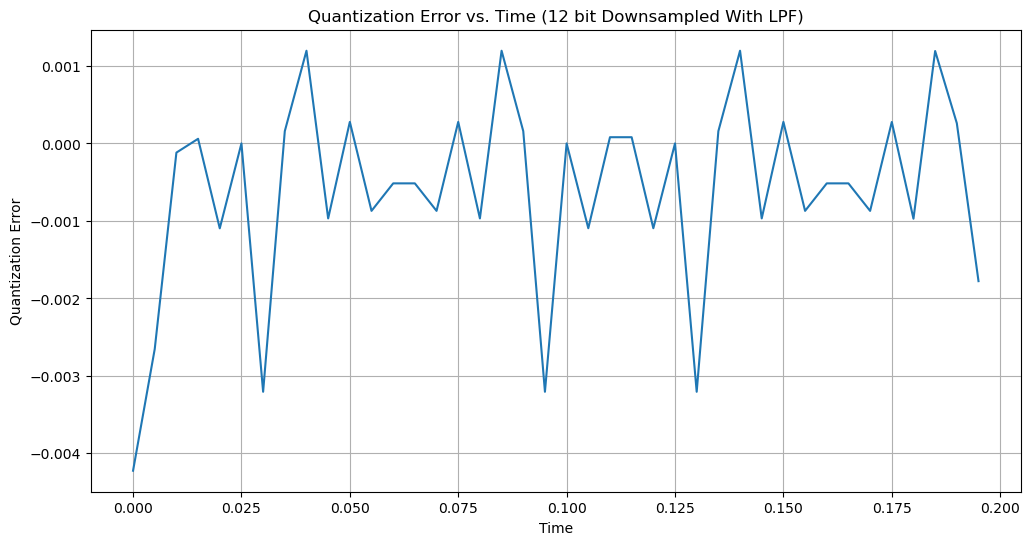

In [701]:
error = downsampled_signal - continuous_signal4
plt.figure(figsize=(12, 6))
plt.plot(t4, error)
plt.xlabel("Time")
plt.ylabel("Quantization Error")
plt.title(f"Quantization Error vs. Time (12 bit Downsampled With LPF)")
plt.grid(True)
plt.show()